In [1]:
# YOLO reference: https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml
# YOLO tutorial: https://docs.ultralytics.com/tutorials/train-custom-datasets/

In [1]:
import os # Operational system
import shutil # 
import yaml
from PIL import Image
from glob import glob # Managing directories
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import logging
import statistics as stats

In [ ]:
# This notebook convert the original dataset, its directories and labels to
# YOLO format

In [2]:
# Original dataset and YOLO dataset directories

thickBlood = '../thick-blood-smears-150'
thickBloodYOLO = '../malaria/thick-blood-smears-150-YOLO'

subfolders = glob(thickBlood + "/*/", recursive = True)

In [3]:
def getNewLine (line, info):
    global counter
    
    line = line.split(',')
    info = info.split(',')
    
    center_x = float(line[5]) / float(info[1])
    center_y = float(line[6]) / float(info[2])
    
    p_x = float(line[7]) / float(info[1])
    p_y = float(line[8]) / float(info[2])
    
    r = ((float(line[7]) - float(line[5])) ** 2 + (float(line[8]) - float(line[6])) ** 2) ** 0.5
    
    radius = ((p_x - center_x) ** 2 + (p_y - center_y) ** 2) ** 0.5
    
    newLine = '0 ' + str(center_x) + ' ' + str(center_y) + ' ' + str(radius * 2) + ' ' + str(radius * 2)
    
    counter = counter + 1
    
    widths.append(int(r * 2))
    
    return newLine

def setLabel (source, destiny):
    lblPath = source
    newLines = []
    
    with open(lblPath) as f:
        lines = f.readlines()
        
        mainLine = 0
        
        if(len(lines) > 0):
            mainLine = lines.pop(0)
        
        for i in range(len(lines)):
            line = lines[i]
            newLine = ''
            
            isParasite = line.split(',')[1] == 'Parasite'
            
            if(isParasite):
                
                newLine = getNewLine(line, mainLine)
                newLines.append(newLine)
        
    patient = source.split('/')[-1]
    destiny = destiny + patient

    with open(destiny, 'w') as f:
        f.write('\n'.join(newLines))

def imagePath2InfoPath (path):
    path = path.replace(thickBlood, thickBlood + "/GT_updated", 2)
    path = path.replace("jpg", "txt", 2)
    
    return path

In [4]:
# This block is based on informations of label's content into original dataset.
# It gets its images and labels and copy to the brand new dataset in YOLO format

widths = []
labels = []
counter = 0

for s in subfolders:
    print("Current subfolder: ",s)
    imgDir = s + '*.jpg'
    imgs = glob(imgDir, recursive = True)
    
    lblDir = s.replace('thick-blood-smears-150/', 'thick-blood-smears-150/GT_updated/', 2) + '*.txt'
    labelsPath = glob(lblDir, recursive = True)
    
    imagesPathYOLO = '../malaria/thick-blood-smears-150-YOLO/images/train/'
    labelsPathYOLO = '../malaria/thick-blood-smears-150-YOLO/labels/train/'
    
    #patient = s.replace('TF', '').split('_')[0]
    patient = s.replace(thickBlood + '/TF', '', 2).split('_')[0]
    
    if("GT" in patient):
        continue

    if('N' in patient):
        patient = patient.replace('N', '', 2)

    if(len(patient) > 3):
        patient = patient.split('W')[0]
    
    patient = int(patient)
    
    if(patient > 105 and patient <= 120) :
        imagesPathYOLO = '../malaria/thick-blood-smears-150-YOLO/images/val/'
        labelsPathYOLO = '../malaria/thick-blood-smears-150-YOLO/labels/val/'
        
    elif (patient > 120) :
        imagesPathYOLO = '../malaria/thick-blood-smears-150-YOLO/images/test/'
        labelsPathYOLO = '../malaria/thick-blood-smears-150-YOLO/labels/test/'
    
    #for lblPath in labelsPath:
    #    counter = 0
        
    #    setLabel(lblPath, labelsPathYOLO)
        
    #    labels.append(counter)

    for i in imgs:
        counter = 0
        imgCheck = True
        
        lblPath = imagePath2InfoPath(i)

        try: 
            setLabel(lblPath, labelsPathYOLO)
            labels.append(counter)
        except:
            imgCheck = False
            #patient = lblPath.split('/')[-1]
            #destiny = labelsPathYOLO + patient
            
            #with open(destiny, 'w') as f:
            #    f.write("")
        if(False):
            img = mpimg.imread(i)
            onlyImage = i.split('/')[-1]
            newPath = imagesPathYOLO + onlyImage
            plt.imsave(newPath,img)
            
            
            

print('---')
print(len(widths))
print(stats.mean(widths))
print(stats.stdev(widths))
print(max(widths))
print(min(widths))
print('--')
print(len(labels))
print(max(labels))
print(min(labels))
print(stats.mean(labels))
print(stats.stdev(labels))

Current subfolder:  ../thick-blood-smears-150/TF57_CV11/
Current subfolder:  ../thick-blood-smears-150/TF107_249/
Current subfolder:  ../thick-blood-smears-150/TF120_1552/
Current subfolder:  ../thick-blood-smears-150/TF137_US8/
Current subfolder:  ../thick-blood-smears-150/TF90_15_60/
Current subfolder:  ../thick-blood-smears-150/TF108_256/
Current subfolder:  ../thick-blood-smears-150/TF5N_535/
Current subfolder:  ../thick-blood-smears-150/TF66_CS39/
Current subfolder:  ../thick-blood-smears-150/TF124_S540/
Current subfolder:  ../thick-blood-smears-150/TF25_15_1_52/
Current subfolder:  ../thick-blood-smears-150/TF112_CJ10/
Current subfolder:  ../thick-blood-smears-150/TF3N_536/
Current subfolder:  ../thick-blood-smears-150/TF47_UW29/
Current subfolder:  ../thick-blood-smears-150/TF74_Scr561/
Current subfolder:  ../thick-blood-smears-150/TF45_UW18/
Current subfolder:  ../thick-blood-smears-150/TF141_CT12/
Current subfolder:  ../thick-blood-smears-150/TF142_US27/
Current subfolder:  ..

9.715483412884701
191
3
--
1830
341
0
46.179781420765025
56.35062581749447


In [5]:
# Counting bouding boxes x number of images based on intervals in [quants]

classes = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
wtf = []
quants = ['0-25', '25-50', '50-75', '75-100', '100-125',
         '125-150', '150-175', '175-200', '200-225',
         '225-250', '250-275', '275-300',  '300-325', '325-350']

for i in labels:
    if(i>= 0 and i < 25):
        classes[0] += 1
    elif(i>= 25 and i < 50):
        classes[1] += 1
    elif(i>= 50 and i < 75):
        classes[2] += 1
    elif(i>= 75 and i < 100):
        classes[3] += 1
    elif(i>= 100 and i < 125):
        classes[4] += 1
    elif(i>= 125 and i < 150):
        classes[5] += 1
    elif(i>= 150 and i < 175):
        classes[6] += 1
    elif(i>= 175 and i < 200):
        classes[7] += 1
    elif(i>= 200 and i < 225):
        classes[8] += 1
    elif(i>= 225 and i < 250):
        classes[9] += 1
    elif(i>= 250 and i < 275):
        classes[10] += 1
    elif(i>= 275 and i < 300):
        classes[11] += 1
    elif(i>= 300 and i < 325):
        classes[12] += 1
    elif(i>= 325 and i < 350):
        classes[13] += 1
        
    if(i == 0):
        wtf.append(i)

In [7]:
print(classes)
print(len(classes))
print(len(quants))

[967, 317, 149, 108, 72, 77, 53, 48, 13, 8, 10, 4, 2, 2]
14
14


Text(0, 0.5, 'y')

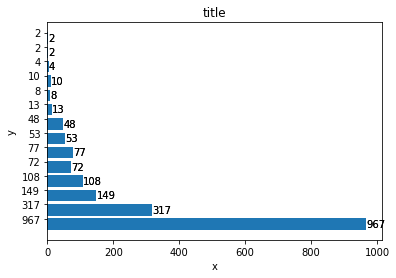

In [12]:
# Testing differents types of charts
# This one is a bar chart

y = classes
x = quants

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(x))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(y, minor=False)

plt.title('title')
plt.xlabel('x')
plt.ylabel('y')   

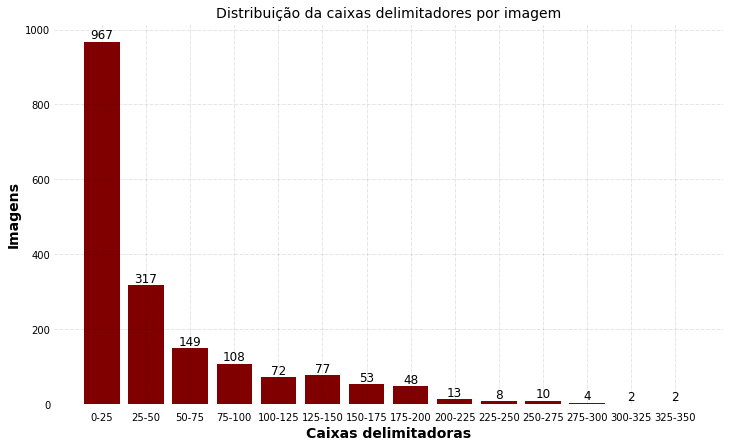

In [43]:
# Plotting and drawing the distribution of bouding boxes

# Figure Size
fig, ax = plt.subplots(figsize =(12, 7))
 
# Horizontal Bar Plot
bars = ax.bar(x, y, color='maroon')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 0)
 
# Add x, y gridlines
ax.grid(visible = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 12,
             color ='black')
 
plt.title('Distribuição da caixas delimitadores por imagem', fontsize = 14)
plt.xlabel('Caixas delimitadoras', fontsize = 14, fontweight = 'bold')
plt.ylabel('Imagens', fontsize = 14, fontweight = 'bold') 

# Show Plot
plt.show()